<a href="https://colab.research.google.com/github/Bobobert/RL_notebooks/blob/main/core22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción al Aprendizaje por Refuerzo con Python 🐍
*por Roberto E. López Díaz* 🧑
## Google Colab
Google Colab es una herramienta fenomenal para desarrollo y pruebas de  prácticas *cortas*. Esto por dos razones, la primera es limitación de recursos y el tiempo que los presta al usuario (esto siempre y cuando exista disponibilidad), no es una herramienta recomendable de usar para experimentos de tiempo extendido o que requieran grandes capacidades de memoria. Segunda razón, varios experimentos se pueden acortar utilizando el hardware de aceleración: GPU o TPU.

Este entorno cuando se ejecuta, se inicia una instancia de máquina virtual (VM) remota de linux (Distro Ubuntu), usualmente se presta de uno a dos núcleos de CPU y alrededor de 12 GB de RAM. En la opción de **Entorno de ejecución** -> **Cambiar tipo de entorno de ejecución** se puede solicitar (de estar disponible) una nueva instancia con hardware GPU o TPU alocado adicionalmente a los otros recursos. La memoria del estos dispositivos también cambia según su disponibilidad.

## Preparando el entorno de ejecución
Se instalará las librerias de python necesarias para llevar a cabo las practicas de aprendizaje por refuerzo. En un equipo local es buena práctica confiugurar estos entornos con entornos virtuales ya sea con *venv* o *conda*.

Dentro del entorno de Colab, existe por defecto una instalación de python con su pip y un gran número de paqueterias populares ya instaladas para funcionar dentro de esta libreta.


In [1]:
!python --version

Python 3.7.14


In [2]:
!pip list | egrep "numpy|tensorboard|torch|gym"

gym                           0.25.2
gym-notices                   0.0.8
numpy                         1.21.6
tensorboard                   2.8.0
tensorboard-data-server       0.6.1
tensorboard-plugin-wit        1.8.1
torch                         1.12.1+cu113
torchaudio                    0.12.1+cu113
torchsummary                  1.5.1
torchtext                     0.13.1
torchvision                   0.13.1+cu113


En este caso será suficiente instalar solo *stable-baselines3* para usar gym, pip solucionará los paquetes necesarios y su versionado.

In [3]:
!pip install stable-baselines3[extra] pybullet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177 kB 30.6 MB/s 
     |████████████████████████████████| 91.7 MB 36 kB/s 
     |████████████████████████████████| 1.5 MB 48.0 MB/s 
     |████████████████████████████████| 1.1 MB 51.0 MB/s 
     |████████████████████████████████| 1.6 MB 23.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616821 sha256=969e3d1e3035a6d2d4cfe786e1d117b2dab8e2925cd8319282ef5601cf5bff2a
  Stored in directory: /root/.cache/pip/wheels/76/ee/9c/36bfe3e079df99acf5ae57f4e3464ff2771b34447d6d2f2148
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.4.2-py3-none-any.whl size=441027 sha256=57186dd63abe83bc45d1574f1bb447ecb4e70610909bb65933f497aa6b7762ec
  Stored in directory: /root/.cache/pip/w


Para realizar visualizaciones dentro de algunos entornos de Gym dentro de colab, se tienen que instalar algunos paquetes adicionales.

In [4]:
#!git clone https://github.com/Bobobert/RL_Toy
!pip install gif pyglet pyvirtualdisplay
#!cd ./RL_Toy/ && pip install -e .
!pip install git+https://github.com/Bobobert/RL_Toy.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 36.4 MB/s 
  Created wheel for gif: filename=gif-3.0.0-py3-none-any.whl size=4818 sha256=72fe74580b0c04505b8b49272a707a67ff5ac6f32b3c42afe3422c6721f07254
  Stored in directory: /root/.cache/pip/wheels/21/63/09/b1e3c512d244da0a7c1d9565f09592612d04b79ccbb95146ae
Successfully built gif
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/Bobobert/RL_Toy.git to /tmp/pip-req-build-qosq5hv9
  Running command git clone -q https://github.com/Bobobert/RL_Toy.git /tmp/pip-req-build-qosq5hv9
  Created wheel for RL-Toy: filename=RL_Toy-0b8-py3-none-any.whl size=17096 sha256=c75d12c335e7af42b715f9fa479132eb5766a33635bc510bfc5767213dcfa139
  Stored in directory: /tmp/pip-ephem-wheel-cache-bolv0pwm/wheels/af/c6/57/976c17ac689a8ad50865c365168e19ce71d3e815a538b3f3ed
Successfully built 

Y para linux tamién serán necesarios algunos paquetes para visualizar videos. Puede que estás no sean necesarias si está realizando el entorno en un equipo local con GUI.

In [5]:
!sudo apt-get update
!sudo apt-get install python-opengl ffmpeg xvfb

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [92.1 kB]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,990 kB]
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:

In [6]:
# Virtual display
from pyvirtualdisplay import Display

virtual_display = Display(visible=0, size=(1280, 720))
virtual_display.start()

## Crear entornos con el paquete de gym

Para comenzar a utilizar Gym se tiene que importar el paquete en Python. Hoy  en día, esta paqueteria se utiliza por defecto en las tareas de aprendizaje por refuerzo (**RL**). Desde su primera versión publicada en 2015 por el equpo de oepnAI, estableció una interfaz sencilla y eficaz para diseñar los entornos que representan los problemas de RL (en otras palabras el diseño del POMDP o MDP).

Se considerá entre los practicantes del área representar el problema a resolver con esta interfaz para que se conserve la compatibilidad con demás implementaciones y experimentos, en la busqueda de mantener una buena *reproducibilidad* de los resultados que se publican.

In [7]:
import gym

Los entornos qye gym puede crear se encuentran registrados ya dentro del paquete. Se pueden seleccionar y crear una instancia de dicho entorno con el método *make*. Los entornos disponible o como registrar entornos personalizados se encuentra dentro de la documentación de [gym](https://www.gymlibrary.dev/).

En esta ocasión se crea el entorno de un péndulo invertido.

In [8]:
env = gym.make("CartPole-v1")

### Métodos de un  entorno de gym

```
# Necesario ejecutar cuando se desea comenzar a utilizar un entorno
obs = env.reset()

# Para avanzar en un MDP o POMDP se toma una desición o acción, este método
# cálcula la transición entre estados internos dada la acción. Regresa la información
# según el plantamientode un POMDP
obs, reward, done, info = env.step(action)

# Visualizar el entorno. Está disponible en algunos entorno.
env.render()

# Cuando se termine de utilizar esta instancia se puede cerrar para terminar todos los sub-procesos que fueron necesarios.
env.close()

```


### Atributos de un entorno de gym


```
# Representación del espacion de observaciones o estados
env.observation_space

# Representación del espacio de acciones
env.action_space

# Representación del espacio de recompensas o costos
env.reward_space

```

In [9]:
env.reset()

array([ 0.00529305,  0.01750774,  0.00859404, -0.02592386], dtype=float32)

[RL_Toy](https://github.com/Bobobert/RL_Toy) es una pequeña colección de ejemplos diseñados por el autor para diseñar entornos y agentes con interfaces similares a la de Gym. Aquí solo se hará uso de un par de funciones para crear ilustraciones facilmente.

In [10]:
from RL_Toy import render, runEnv

Mean accumulate Reward 0.00, episodes 1


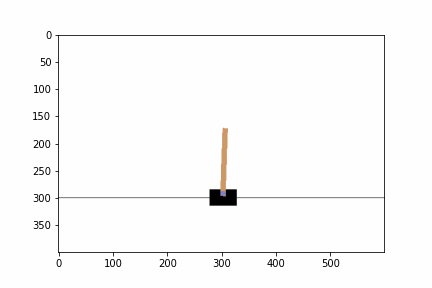

In [11]:
runEnv(env, 10)

## Discretizar entornos con espacios continuos
Antes de meterse de lleno a las soluciones **nucleares** (DRL es Pesado), y crear una referencia o baseline, una idea clásica es realizar criterios para generar espacios discretos a partir de espacios continuos (un mapeo biyectivo entre espacios). Así se podrián aplicar estrategias tabulares de RL tal como SARSA o Q-Learning.

De esta [libreta](https://github.com/Bobobert/DIL-DRL/blob/main/DIL%20-%20DRL%20C7v0.ipynb), se  extrae el ejemplo para aplicar una discretización y una implementación de Q-Learning para el entorno de CartPole. 

### Analizando un entorno con espacio continuo

Se llaman y analizan los espacios que provee la instancia del entorno.

In [12]:
env.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

In [13]:
env.observation_space.sample()

array([-1.5642946e+00, -7.2149277e+37,  3.5940316e-01, -9.1596062e+37],
      dtype=float32)

In [14]:
env.observation_space.low

array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32)

In [15]:
env.observation_space.high

array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32)

Estos espacios tipo *Box* se pueden mentalizar como un conjunto de intervalos en lineas rectas, esto en domino de $\mathbb{R}$. 

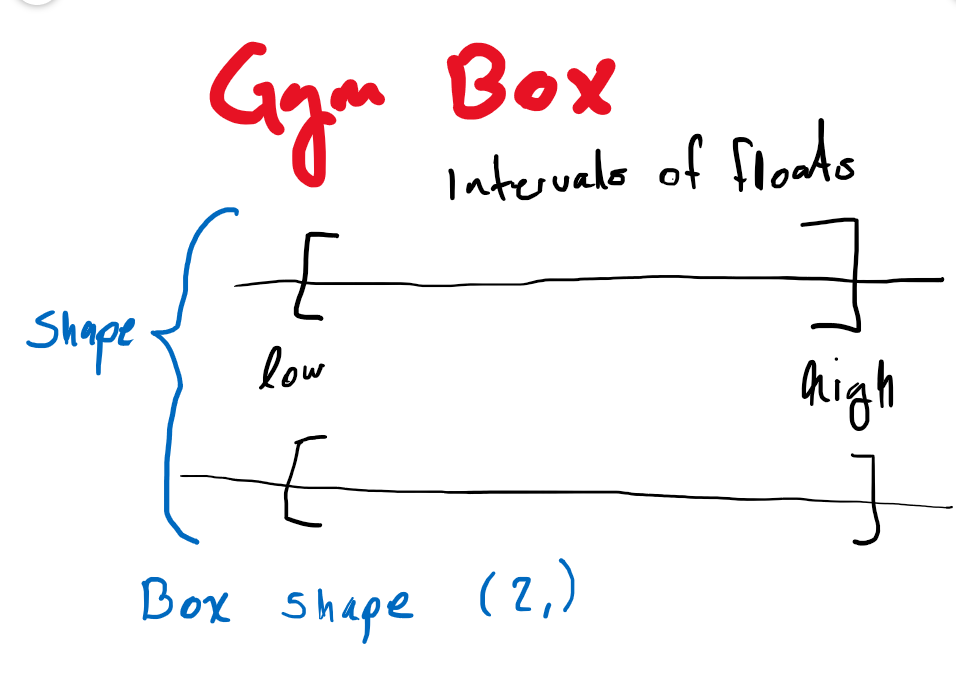


A continuacion, se presenta una de las maneras sencilla de hacer esta tarea como ejemplo. No es la unica o particularmente la mejor manera. Usualmente estas tareas tienen que ser especializadas al tipo de problema que se este manejando. 

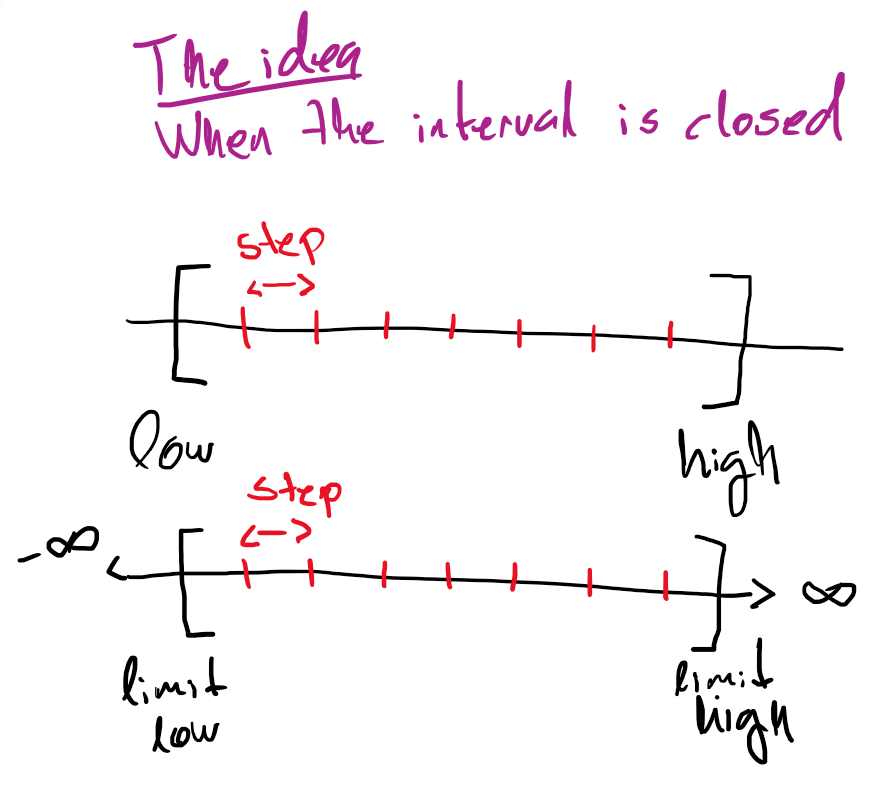

La siguiente implementación se hizo con los entorno de "Control clásico" en mente, también con la interfaz propuesta en RL_Toy (para entorno es similar a Gym pero incluye agentes). Esto no debería precupar mucho al lector, gracias a que Python hace cómo se lee, la función debería ser suficientemente expresiva para el lector como para el interprete de Python.


Antes se extraerán paquetes de python para solo esta parte.

In [16]:
from math import ceil, floor
import numpy as np

import matplotlib.pyplot as plt

from RL_Toy.utils import render, runAgent, runEnv, Q_function, checkForTuple
from RL_Toy.base import Policy, Agent

In [17]:
def toDiscreteSpace(box_space, step: list, limits = None):
    """
    Function to generate a discrete space from a continuos one

    parameters
    ----------
    box_space: gym.spaces.Box
        Expecting a box type of space to generate a discrete one
    step: list
        A list with the step sizes for each dimension. This should match
        the observation_space.shape
    limits: list
        A list with the limits per interval, if None no limits are applied.
        Default is None
    """
    low = box_space.low
    high = box_space.high
    shape = box_space.shape
    spaces = []
    if limits is None:
        limits = [None for i in step]
    for l, h, step_, limit in zip(low, high, step, limits):
        # Calculating how many boxes are needed
        if limit is not None:
            l, h = limit
        boxes = ceil(abs(h - l)/step_)
        spaces += [np.linspace(l, h, num = boxes)]

    return spaces

def cartesian_product(*arrays):
    """
    Cartesian product of ndarrays
    Extracted from https://stackoverflow.com/a/11146645
    """
    la = len(arrays)
    dtype = np.result_type(*arrays)
    arr = np.empty([len(a) for a in arrays] + [la], dtype=dtype)
    for i, a in enumerate(np.ix_(*arrays)):
        arr[...,i] = a
    return arr.reshape(-1, la)

Para este ejemplo, se escogió diseñar la discretización desde el aspecto de la política. O sea, una clase política que soporte entornos continuos pero los soluciona de manera discreta. Muy en particular, la discretización la realiza por *bines* o por intervalos.

El autor, de volver a realizar esta tarea escogería mejor realizar un *Wrapper* para el entorno que realice el mapeo entre estados. Recordar, de los errores se aprende, aquí está uno para su estudio 😆.

In [18]:
class gymPolicyDiscreteFromCon(Policy):
    """
    Gym policy from a continuos observation space and a
    discrete action space

    parameters
    ----------
    env: gym.Environment
        A gym environment type object
    step: list
        A list with the step sizes for each dimension. This should match
        the observation_space.shape
    limits: list
        A list with the limits per interval, if None no limits are applied.
        Default is None
    epsilon: float

    """
    def __init__(self, env, steps:list = [], limits = None, epsilon:float = 0.0):

        self.spaces = toDiscreteSpace(env.observation_space, steps, limits)
        self.observation_space = cartesian_product(*self.spaces)
        self.env_action_space = env.action_space
        self.pi = dict()

        # using the product to make a dictionary
        for i in self.observation_space:
            i = tuple(i.tolist())
            self.pi[i] = self.env_action_space.sample()
        # deleting the product

        self.steps, self.boxes = steps, []
        self.low = env.observation_space.low
        self.high = env.observation_space.high
        if limits is None:
            limits = [None for i in steps]
        else:
            for i, l in enumerate(limits):
                if l is not None:
                    self.low[i] = l[0]
                    self.high[i] = l[1]
        for l, h, step_, limit in zip(self.low, self.high, steps, limits):
        # Calculating how many boxes are needed
            if limit is not None:
                l,h = limit
            self.boxes += [ceil(abs(h - l)/step_)]
        self.epsilon = epsilon
        self.test = False

    def getAction(self, state):
        if (np.random.uniform() > self.epsilon) or self.test:
            return self.pi[state]
        return self.env_action_space.sample()

    def update(self, state, action):
        assert self.env_action_space.contains(action),\
            "Action must be contained in the environtment's action space"
        self.pi[state] = action 

    def getState(self, state):
        """
        Process a continuos input state into the discrete one. Returns a hashable 
        tuple.
        """
        state = checkForTuple(state)
        assert len(state) == len(self.boxes),\
            "State input must have the same shape as observation_space"
        pos = []
        for s, l, step, b, space in zip(state, self.low, self.steps, self.boxes, self.spaces):
            i = floor((s - l) / step)
            # Bound 
            if i < 0:
                i = 0
            elif i >= b:
                i = b - 1
            pos += [space[i]]
        return tuple(pos)
            

Mas diseños entrejeversardos del ayer. Recordar, esto solo es para un ejemplo breve. Esta clase hereda la interfaz de un agente y lo único que tiene de especial es instanciar una clase Política mostrada previamente.

In [19]:
class gymAgentCon2Dis(Agent):
    def __init__(self, env, env_test = None, **kwargs):
        self.env = env
        self.env_test = env_test

        self.policy = gymPolicyDiscreteFromCon(env, **kwargs)

        super().__init__()

    def processObs(self, obs):
        return self.policy.getState(obs)

Estas son funciones sencillas para realizar pruebas de la evaluación de estos agentes (class Agent) y gráficar los resultados a partir de arreglos  de resultados dispuestos en objetos de Numpy.

In [20]:
# Funciones de prueba y graficas
def test(agent:Agent, n:int = 30):
    results , _ = agent.test(n_test = n)
    print("Return: Mean {}, Std {}".format(np.mean(results), np.std(results)))
    return results

def graphResults(means, stds, testFreq, mod:str, dpi=200):
    mean = np.array(means)
    stds = np.array(stds)
    fig = plt.figure(dpi=dpi)
    plt.title("{}: Mean Return per Episode".format(mod))
    plt.xlabel("Episode")
    plt.ylabel("Mean acumulate Reward")
    x = np.arange(0,len(means)*testFreq, testFreq)
    plt.plot(x, means, label = "Accumulate Reward", lw = 2)
    plt.fill_between(x, means - stds, means + stds, alpha = 0.1)

La siguiente celda va a crear un Agente con el entorno CartPole, lo discretizará en los intervalos dados. Después se ejecuta una prueba del rendimiento de este agente.

In [21]:
agent = gymAgentCon2Dis(env,  steps = [0.25, 0.25, 0.025, 0.25],
                              limits = [None, (-5,5), None, (-5,5)],
                              epsilon = 0.5)
test(agent)

Return: Mean 15.533333333333333, Std 5.1428483245074315


[18.0,
 14.0,
 13.0,
 13.0,
 13.0,
 15.0,
 9.0,
 15.0,
 14.0,
 13.0,
 18.0,
 19.0,
 11.0,
 16.0,
 14.0,
 13.0,
 16.0,
 18.0,
 19.0,
 20.0,
 10.0,
 37.0,
 13.0,
 11.0,
 14.0,
 14.0,
 24.0,
 13.0,
 11.0,
 18.0]

El rendimiento de este agente no es muy bueno, el entorno de CartPole se soluciona cuando los agentes acumulan los 500 puntos de recompensa. En promedio este solo da 26! 🙅

Mientras, el espacio de observaciones ha disminuido bastante. Manejar estas combinaciones o el total de observaciones ya se hace finita, ideal para una tabla  que se tiene que almacenar en nuestras computadoras.

In [22]:
agent.policy.observation_space.shape

(2121600, 4)

In [23]:
agent.policy.spaces

[array([-4.80000019, -4.5473686 , -4.29473701, -4.04210542, -3.78947383,
        -3.53684225, -3.28421066, -3.03157907, -2.77894748, -2.52631589,
        -2.2736843 , -2.02105271, -1.76842112, -1.51578953, -1.26315794,
        -1.01052636, -0.75789477, -0.50526318, -0.25263159,  0.        ,
         0.25263159,  0.50526318,  0.75789477,  1.01052636,  1.26315794,
         1.51578953,  1.76842112,  2.02105271,  2.2736843 ,  2.52631589,
         2.77894748,  3.03157907,  3.28421066,  3.53684225,  3.78947383,
         4.04210542,  4.29473701,  4.5473686 ,  4.80000019]),
 array([-5.        , -4.74358974, -4.48717949, -4.23076923, -3.97435897,
        -3.71794872, -3.46153846, -3.20512821, -2.94871795, -2.69230769,
        -2.43589744, -2.17948718, -1.92307692, -1.66666667, -1.41025641,
        -1.15384615, -0.8974359 , -0.64102564, -0.38461538, -0.12820513,
         0.12820513,  0.38461538,  0.64102564,  0.8974359 ,  1.15384615,
         1.41025641,  1.66666667,  1.92307692,  2.17948718,  2

In [24]:
agent.processObs((-4.810, -2, -0.36, -1037986398125454))

(-4.800000190734863, -1.9230769230769234, -0.36810581611864496, -5.0)

### Q-Learning

Siguiente, se encuentra una implementación de Q-learning tabular o clásico teniendo en mente la clase *Agent* ya presentada. Igual, se pueden crear cambios dependiendo de las decisiones de diseño que se propongan.


In [25]:
def Q_learning(agent:Agent, episodes:int,
          gamma:float = 0.99, alpha: float = 0.01, test_frequency: int = 10**2,
          epsilon_life:int = None):
    """
    Q_learning algorithm

    parameters
    -----------
    agent: The Agent object which contains the environment
        and the policy
    epsidodes: integer > 0
        Total number of episodes to run the policy and to improve from
    gamma: float
        Discount factor
    alpha: float > 0
        Learning step
    test_frequency: integer > 0
        The frequency in which a test to evaluate the policy performance is done
    """
    assert (alpha > 0), "alpha learn step must be in the interval [0,1]"
    assert (gamma >= 0) and (gamma <= 1), "Gamma discount factor must be in the interval [0,1]"
    assert episodes > 0, "episodes needs to be am integer greater or equal to 1 iteration."

    Q = Q_function()
    process_observation = agent.processObs
    policy = agent.policy
    if epsilon_life is None:
        epsilon_life = episodes

    testMean, testStd = [], []
    for episode in range(episodes):

        # Do evaluation if it is time
        if episode % test_frequency == 0:
            returns, _ = agent.test(n_test = 30)
            testMean += [np.mean(returns)]
            testStd += [np.std(returns)]

        # Change epsilon
        policy.epsilon = max(0, (1 - (episode) / epsilon_life))

        # Sample a whole episode
        obs = env.reset()
        state = process_observation(obs)
        done = False
        while not done:
            action = policy.getAction(state)
            obs, reward, done, info = env.step(action)

            state2 = process_observation(obs)
            action2_max = Q.maxAction(state2)

            actualQ = Q[(state, action)]
            td_target = reward + gamma * Q[(state2, action2_max)]

            Q[(state,action)] = actualQ + alpha * (td_target - actualQ)
            
            agent.update(state, Q.maxAction(state))
            state = state2

    graphResults(testMean, testStd, test_frequency, "Q-Learning")
    return Q

Se pasa el agente creado previamente para actualizar su política con una tabla de valores Q. Existen ciertas garantias teoricas para este proceso, sin embargo estas son para nuestra aproximación de entorno, no el original. Esto es, ya ¡estamos aproximando soluciones sobre una aproximación a nuestro problema! 😱

Acostumbrarse a estas aproximaciones una dentro de otra, el *State of the art* (SOTA) del área está compuesto mayormete por este tipo de soluciones.

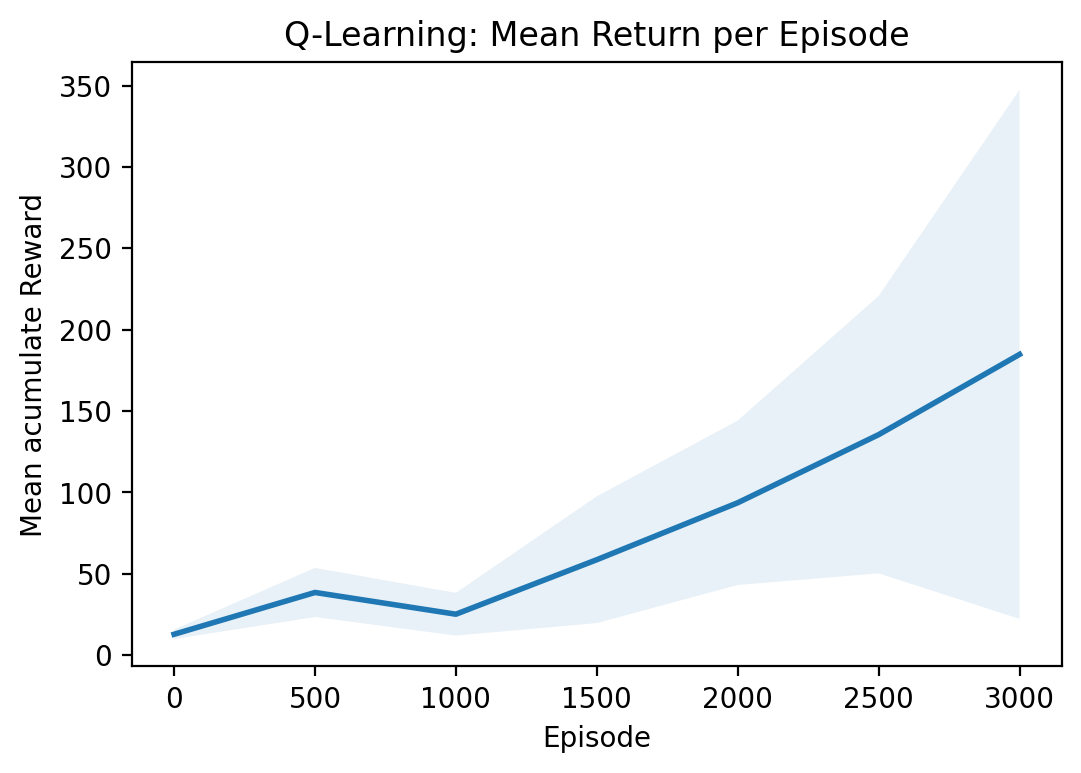

In [26]:
Q_q = Q_learning(agent, episodes = 3000 + 1, alpha = 0.05, test_frequency= 500,
                    epsilon_life = 5000)

In [27]:
test(agent)

Return: Mean 173.43333333333334, Std 137.88489966474052


[48.0,
 257.0,
 212.0,
 121.0,
 375.0,
 102.0,
 500.0,
 232.0,
 130.0,
 77.0,
 72.0,
 55.0,
 39.0,
 33.0,
 67.0,
 65.0,
 134.0,
 500.0,
 56.0,
 111.0,
 100.0,
 129.0,
 338.0,
 100.0,
 232.0,
 372.0,
 77.0,
 429.0,
 86.0,
 154.0]

Mean accumulate Reward 0.00, episodes 1


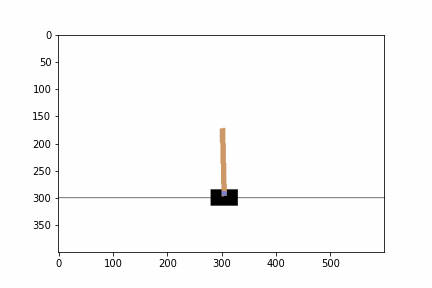

In [28]:
runAgent(agent, 100)

A pesar de ser una solución aproximada de una aproximación al problema; el autor promete no enfatizar más esto, nuestra solución mejoró bastante contra una política aleatoria (la madre de las políticas referencia). Esto es bueno, y seguro si juegan con los parámetros la solución de Q-learning podría mejorar.

## Aproximaciones

El momento llega rápido, se espera que no se sienta como topar con un muro muy alto y si lo es sería muy comprensible. Dentro del área de RL aproximaciones son lamentablemente; o tal vez no  tanto, el pan de cada día o necesarías. Desde el problema más evidente si en vez de tratar el entorno anterior como discreto se quisiera elaborar la tabla Q con los espacios originnal, o sea, continuos ¿Qué tan grande es necesaria la tabla Q? 🤔 

La primera pista es: ¿Es el dominio de mi espacio contable? O sea, se podrían hacer *n-bines* o contenedores para cada valor posible. La respuesta para CartPole es no, por el detalle mencionado sobre el dominio que *Box* representa, $\mathbb{R}$.

Por esa razón, y otras más, existe esta necesidad de solucionar las cosas en dominios más razonables, dónde estás proyecciones seán *aproximadamente* lo mismo entre dominios.

### Deep RL
Y rápidamente, los aproximadores más populares de esta decada: las redes neuronales profundas, ya han reclamado su rol en el campo del aprendizaje por refuerzo. Aunque existen trabajos desde la decada de los 90's (Tesauro, Hochrieter & Schmidhuber) que aplican redes neuronales (NN) en RL, en está ultima decada; puntualmente desde 2013, se ha popularizado sus variantes profundas (DNN) con lo cual han bautizado al conjunto de los trabajos de RL con DNN como Aprendizaje por refuerzo profundo (Deep Reinforcement Learning, DRL).

 El autor está de acuerdo en considerar el DRL como un subconjunto de RL y no su área a parte. Esta aclaración es importante para desmitificar a algunos nuevos prácticantes que $\text{DRL} ∉ \text{RL}$. DRL tiene todas las características y objetivos que RL, con sus agregados provenientes del aprendizaje profundo (DL).

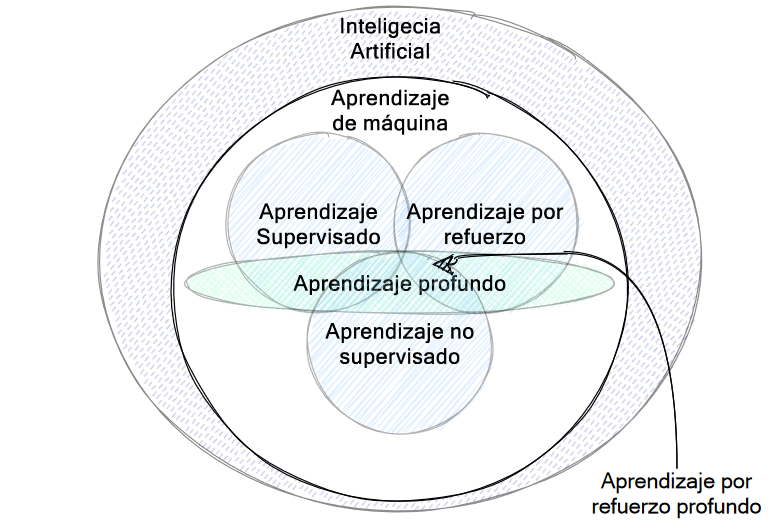

Entonces, ahora utilizaremos DL para generar aproximaciones de diversas maneras. Desde aproximar una tabla Q *continua* con el poder una DNN, o producir estados a partir de observaciones con *embedings*. O inclusive, producir toda una política misma una red que observe su entorno, lo procese y tome su decisión todo en un solo *feed-forward*. Muchas variaciones pero todos para un resolver la propuesta inicial de la hipotesis de la recompensa.

$$\max_{\pi}∑_{\text{Env}}\gamma^{i}R_i$$

### Stable-baselines3

Es un [paquete de Python](https://stable-baselines3.readthedocs.io/en/master/index.html) que alberga una gran cantidad de implementaciones de algoritmos de DRL, que provenien de los autores o realizadas por la comunidad. Se utiliza Tensorflow y/o Pytorch como frameworks para el DL.

El proposito de una paquetería de este tipo es importante para la comunidad principalmente en dos sentidos:
- Facilitar el acceso de los algoritmos probados a la comunidad
- Estandarizar implementaciones, facilitandos la comparasión entre las referencias (o *baselines*) y algoritmos nuevos.


La relevancia cae más en la ética de los practicantes de todas las areas del aprendizaje de máquina (ML), **reproducibilidad**; y claro después la explicabilidad pero ese es caldo de otra sopa. 

Por supuesto, que para todos facilita el trabajo de realizar sus implementaciones y de manera indirecta tamibén ayuda a reducir el *boilerplate* del diseño de muchos experimentos de RL. El reto será estudiar, y comprobar los nuevos diseños propuestos dentro de las interfaces propuestas. O, se puede omitir y diseñar sus propias implementaciones. Queda a criterio del lector a sopesar sus opiciones.

Para el resto de la libreta se presentará como utilizar este paquete para crear y entrenar agentes en los diversos entornos de Gym junto con una breve explicación de DQN y PPO.

#### Implementaciones disponibles

Al consultar [esta sección](https://stable-baselines3.readthedocs.io/en/master/guide/algos.html) de la pagina del paquete, se puede observar el siguiente concentrado.


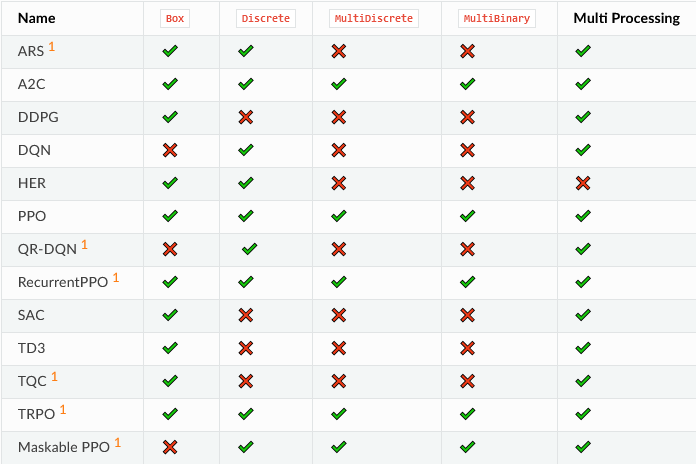

Todos esos nombres o acronimos representan todo un trabajo (articulos, congresos, libros) detrás. No son todos los algoritmos de DRL pulicados a la fecha, pero si los más populares y probados (haciendo justicia a su nombre de *baselines*).

Las columnas muestran que tipo de espacio de acciones soportan y si soporta **Multi Processing** que depende del algoritmo podría ser muy importante o solo relevante, de todas formas tenerlo es lo ideal*.

Antes de decir que es DQN, veamos lo simplificado que es crear un agente (incluido en esto que es *model*) y rápidamente ponerlo dentro de un búcle de entrenamiento. 😯

In [29]:
from stable_baselines3 import DQN

model = DQN('MlpPolicy', env, verbose=1)
model = model.learn(total_timesteps=10000)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21       |
|    ep_rew_mean      | 21       |
|    exploration_rate | 0.92     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 10648    |
|    time_elapsed     | 0        |
|    total_timesteps  | 84       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22       |
|    ep_rew_mean      | 22       |
|    exploration_rate | 0.833    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 8041     |
|    time_elapsed     | 0        |
|    total_timesteps  | 176      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.4     |
|    ep_rew_mean      | 22.4  

Eso fue rápido y la salida puede no haga mucho sentido ahorita. Utilizaremos una herramienta dispuesta en el paquete para evaluar la política del agente y comparar el resultado contra DQN.

In [30]:
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor

def eval_baseline_model(model, env):
    results, lengths = evaluate_policy(model, Monitor(env))
    print(f'Mean accumulated reward: {np.mean(np.array(results))}. Mean episode lenght {np.mean(np.array(lengths))}')

In [31]:
eval_baseline_model(model, env)

Mean accumulated reward: 9.3. Mean episode lenght 0.45825756949558405


Resultados iniciales. Poco prometedores. 
¿Qué ha pasado?

Estimado lector, esto es un gran problema del DRL todos los algoritmos presentados en esa tabla sufren de problemas sobre *sample efficiency*. Esto es, necesitan un gran  número de muestras para comenzar a aprender;  su herencia del DL. 
Algunos de estos algoritmos, también cuentan con problemas que se presentan en la practica, tales como que son olvidadizos y pueden caer en optimos locales facilmente. 😟

Comenzará nuestra búsqueda de la optimización "doble", una de las DNN y otra del mismo problema de RL, estos están en constante movimiento uno detrás del otro cómo iconos de la animación occidental.


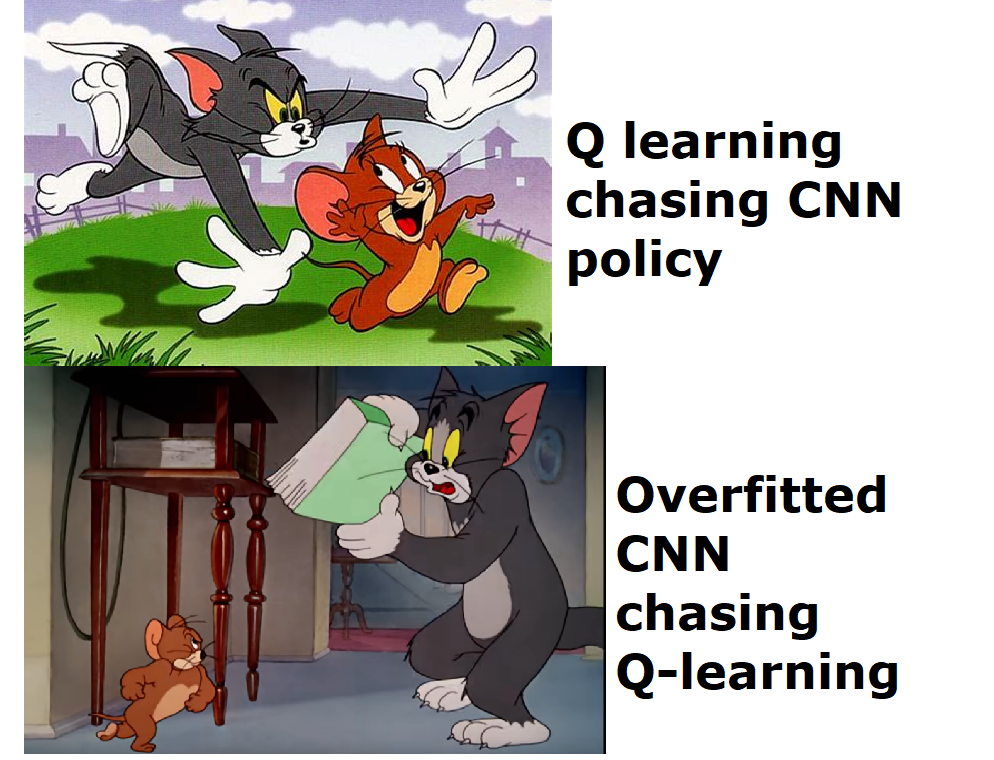

Para remediar el problema con DQN, se tiene que conocer que hiper-parámetros sería ideal mover dado el entorno. Adicionalmente, dejar que el agente extraiga más osbservaciones para que aprenda de ellas y optimice el problema de RL sobre la marcha.

Para el modelo anterior solo agregaremos muchos más pasos


In [32]:
model.verbose = 0 # Shut the verbose mode
model = model.learn(100000)

In [33]:
eval_baseline_model(model, env)

Mean accumulated reward: 197.4. Mean episode lenght 31.122981862283055


Con 56 segundos adicionales de ejecución, nuestro agente DQN ha obbtenido un resultado cercano a la solución de Q-Learning tabular que en total tardó 7 segundos, esto lo hace un orden de ocho veces el tiempo necesario para este sencillo ejemplo. 

Antes de decir que es DQN ¿puede con problemas más *complejos*? al ser un aproximador basado en NN seguro tiene la capacidad de leer textos (tokens), imagenes, y demás tipo de información. Y la tiene, como su ambiente natural *Atari 2600*.

In [34]:
atari_env = gym.make('Breakout-v0')

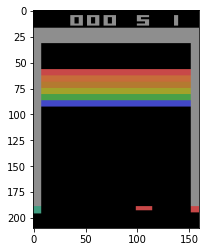

In [35]:
atari_env.reset()
render(atari_env)

Mean accumulate Reward 0.00, episodes 1


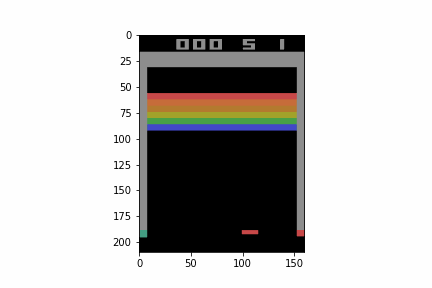

In [36]:
runEnv(atari_env, 20)

In [37]:
from stable_baselines3.common.atari_wrappers import AtariWrapper

atari_env = AtariWrapper(atari_env)

In [ ]:
breakout_model = DQN('CnnPolicy', atari_env, learning_rate=1e-4, buffer_size=10000)
breakout_model.learn(3 * 10 ** 5)

In [ ]:
eval_baseline_model(breakout_model, atari_env)

Del trabajo ya realizado se puede guardar el progreso con el método de save() de los modelos que da la paquetería. 

Posteriormente, estos se pueden leer y volver a cargar en objetos similares

In [ ]:
breakout_model.save('breakout_model_0')